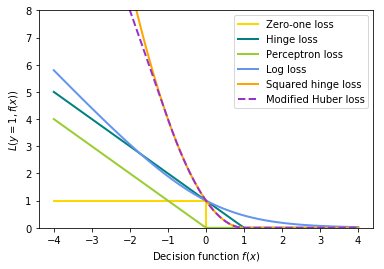

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

Automatically created module for IPython interactive environment


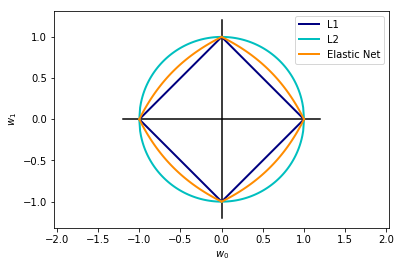

In [2]:
from __future__ import division
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt


def l1(xs):
    return np.array([np.sqrt((1 - np.sqrt(x ** 2.0)) ** 2.0) for x in xs])


def l2(xs):
    return np.array([np.sqrt(1.0 - x ** 2.0) for x in xs])


def el(xs, z):
    return np.array([(2 - 2 * x - 2 * z + 4 * x * z -
                      (4 * z ** 2
                       - 8 * x * z ** 2
                       + 8 * x ** 2 * z ** 2
                       - 16 * x ** 2 * z ** 3
                       + 8 * x * z ** 3 + 4 * x ** 2 * z ** 4) ** (1. / 2)
                      - 2 * x * z ** 2) / (2 - 4 * z) for x in xs])


def cross(ext):
    plt.plot([-ext, ext], [0, 0], "k-")
    plt.plot([0, 0], [-ext, ext], "k-")

xs = np.linspace(0, 1, 100)

alpha = 0.501  # 0.5 division throuh zero

cross(1.2)

l1_color = "navy"
l2_color = "c"
elastic_net_color = "darkorange"
lw = 2

plt.plot(xs, l1(xs), color=l1_color, label="L1", lw=lw)
plt.plot(xs, -1.0 * l1(xs), color=l1_color, lw=lw)
plt.plot(-1 * xs, l1(xs), color=l1_color, lw=lw)
plt.plot(-1 * xs, -1.0 * l1(xs), color=l1_color, lw=lw)

plt.plot(xs, l2(xs), color=l2_color, label="L2", lw=lw)
plt.plot(xs, -1.0 * l2(xs), color=l2_color, lw=lw)
plt.plot(-1 * xs, l2(xs), color=l2_color, lw=lw)
plt.plot(-1 * xs, -1.0 * l2(xs), color=l2_color, lw=lw)

plt.plot(xs, el(xs, alpha), color=elastic_net_color, label="Elastic Net", lw=lw)
plt.plot(xs, -1.0 * el(xs, alpha), color=elastic_net_color, lw=lw)
plt.plot(-1 * xs, el(xs, alpha), color=elastic_net_color, lw=lw)
plt.plot(-1 * xs, -1.0 * el(xs, alpha), color=elastic_net_color, lw=lw)

plt.xlabel(r"$w_0$")
plt.ylabel(r"$w_1$")
plt.legend()

plt.axis("equal")
plt.show()